<a href="https://colab.research.google.com/github/felipheggaliza/ml-tutorials/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTING PACKAGES

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

sb.set_style('whitegrid')

<Figure size 2000x1000 with 0 Axes>

In [2]:
# IMPORTING DATA

df = pd.read_csv('https://raw.githubusercontent.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means/master/cust_seg.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


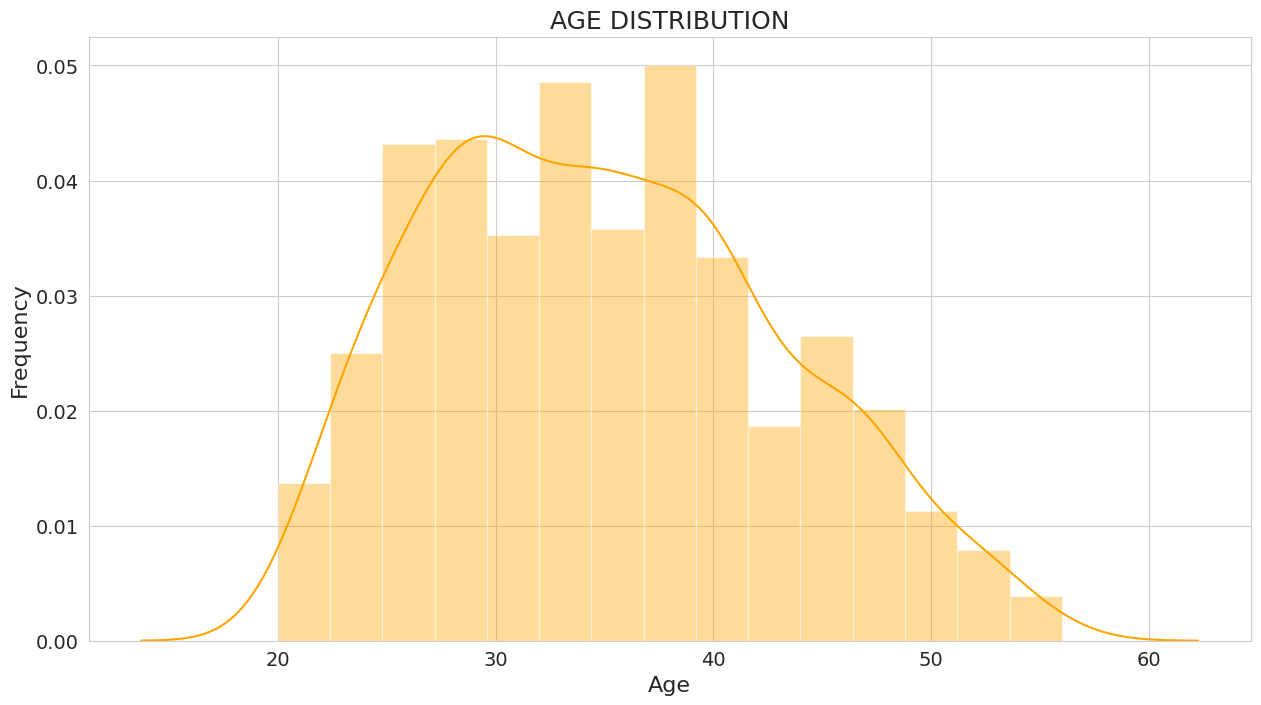

In [15]:
# Age distribution
fig=plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')

print(cl(df['Age'].describe(), attrs = ['bold']))

sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('age_distribution.png')
plt.show()

.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


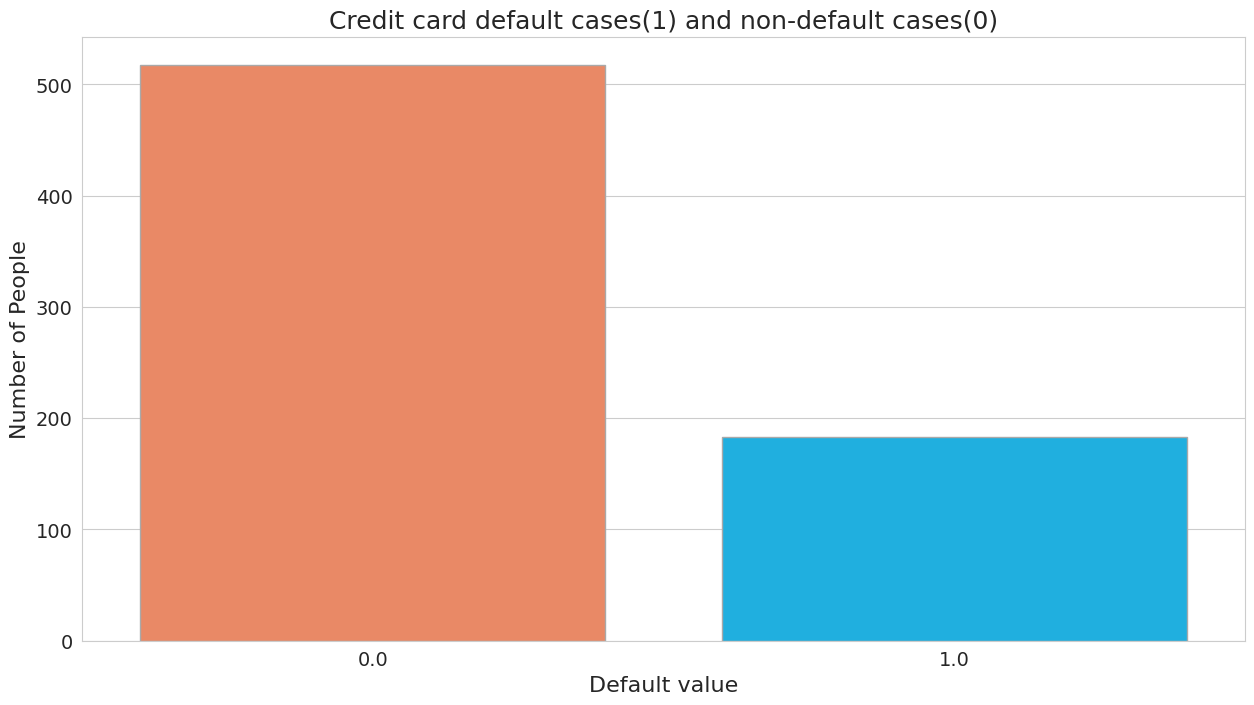

In [16]:
# Credit card default cases
fig=plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


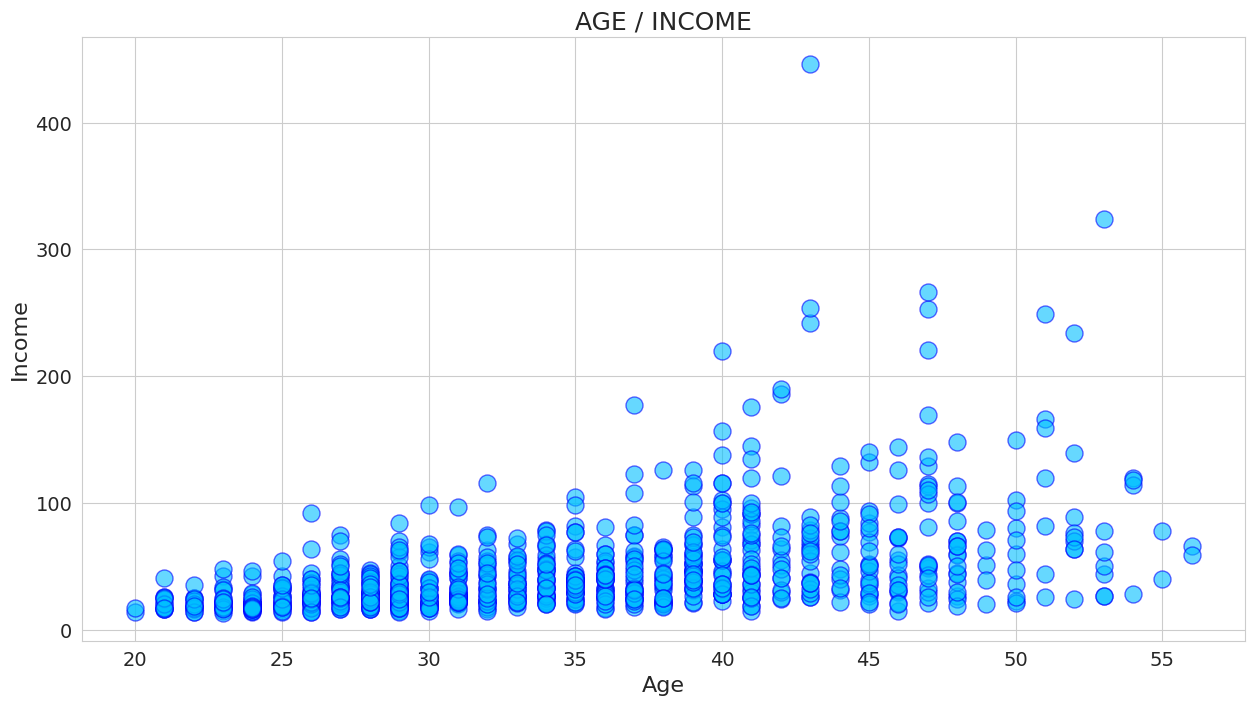

In [17]:
# Age vs Income
fig=plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')

sb.scatterplot('Age', 'Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [18]:
# DATA PROCESSING

X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509 -0.54673283]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677  1.88637138]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385 -0.54673283]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509 -0.54673283]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653  0.66981927]]


<Figure size 1500x800 with 0 Axes>

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


In [8]:
df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [9]:
df.groupby('cluster_num').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_num,,,,,,,,
0,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


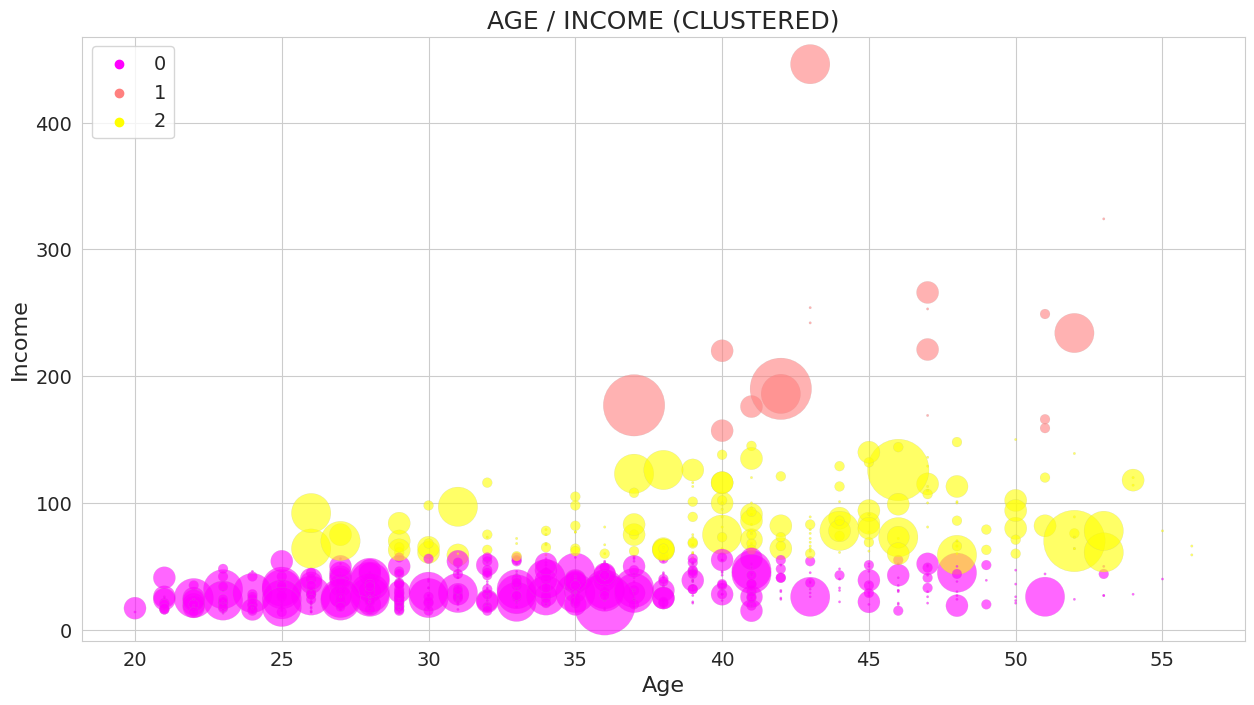

In [20]:
fig=plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')

area = np.pi * (df.Edu) ** 4

sb.scatterplot('Age', 'Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOME (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)


plt.show()

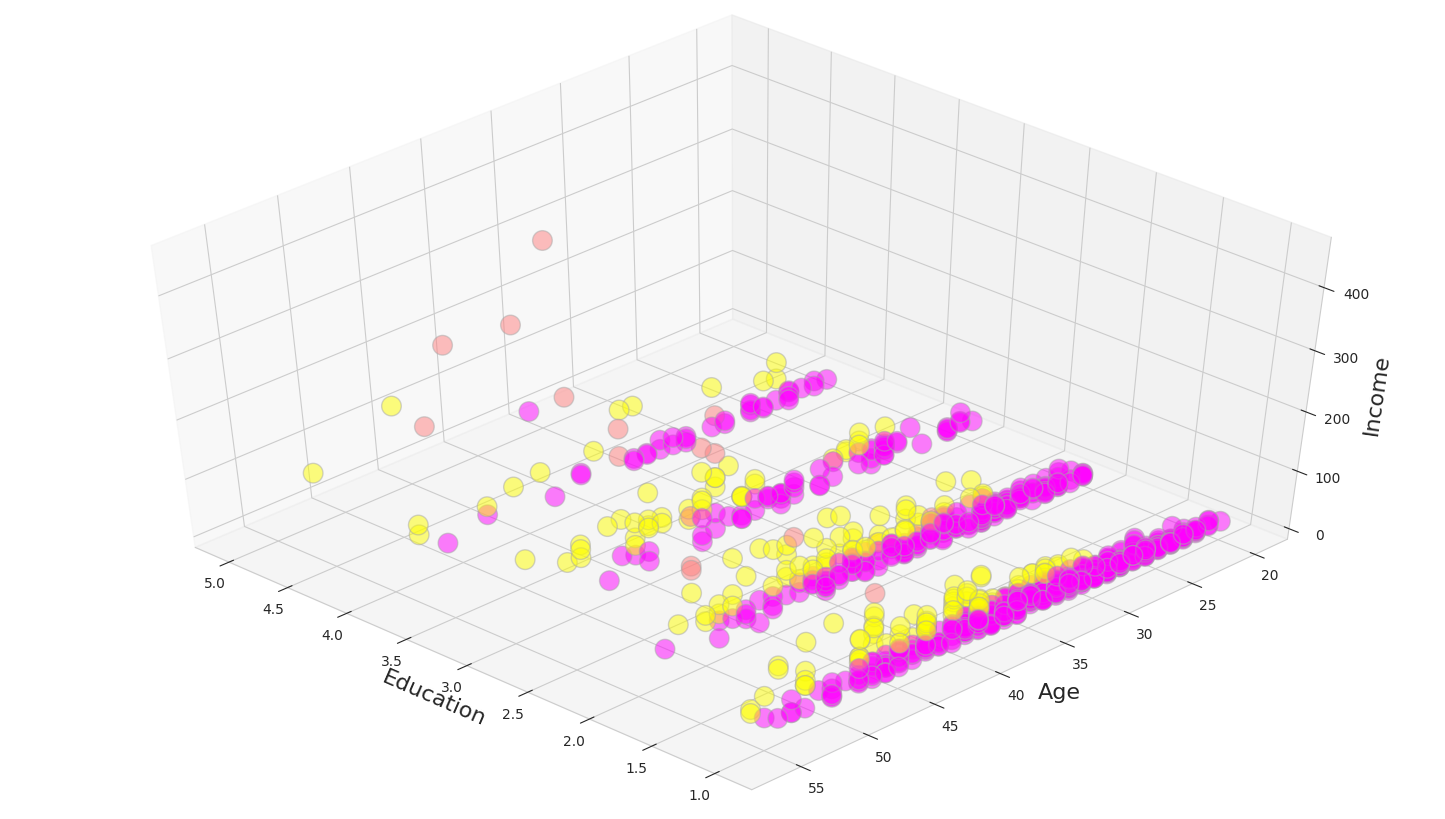

In [21]:
fig=plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')

plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()